## Simulating (pseudo-) random numbers in Python

### Setup

In [1]:
# numpy is the 'Numerical Python' package
import numpy as np

# Numpy's methods for pseudorandom number generation
import numpy.random as rnd

# scipy is the 'Scientific Python' package
# We'll use this to get the gamma function
from scipy.special import gamma

In [2]:
# Print out the versions of software I'm running
import sys
print("Python version:", sys.version)
print("Numpy version:", np.__version__)

Python version: 3.7.6 | packaged by conda-forge | (default, Jan  7 2020, 21:00:34) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.17.4


In [3]:
# Reminder that we need a relatively new version of numpy to make
# use of the latest pseudorandom number generation algorithms.
if int(np.__version__.split('.')[1]) < 17:
    raise RuntimeError("Need Numpy version >= 1.17")    

### Random numbers, seeds, accessing docs

Create a _random number generator_ and call it `rng`. 

In [4]:
rng = rnd.default_rng()

What kind of things can `rng` do? Let's look at the methods available to it using `dir` 

In [5]:
print(dir(rng))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '_bit_generator', '_poisson_lam_max', 'beta', 'binomial', 'bit_generator', 'bytes', 'chisquare', 'choice', 'dirichlet', 'exponential', 'f', 'gamma', 'geometric', 'gumbel', 'hypergeometric', 'integers', 'laplace', 'logistic', 'lognormal', 'logseries', 'multinomial', 'multivariate_normal', 'negative_binomial', 'noncentral_chisquare', 'noncentral_f', 'normal', 'pareto', 'permutation', 'poisson', 'power', 'random', 'rayleigh', 'shuffle', 'standard_cauchy', 'standard_exponential', 'standard_gamma', 'standard_normal', 'standard_t', 'triangular', 'uniform', 'vonmises', 'wald', 'weibull', 'zipf']


So it can simulate from a bunch of common distributions. That's nice. Let's try to generate a simulate standard uniform random variable:

In [6]:
print(rng.uniform())

0.78658288842436


In [7]:
rng.uniform()

0.29599899160720367

Run that cell a few times, and you'll see it get different numbers.

Sometimes nice to have _same_ random numbers. To do that, we set the 'seed' to be any fixed number.

In [8]:
print("First run")
print(18*"-")

rng = rnd.default_rng(seed=1)
print(rng.uniform())
print(rng.uniform())
print(rng.uniform())

First run
------------------
0.5118216247002567
0.9504636963259353
0.14415961271963373


In [9]:
print("Second run")
print(18*"-")

rng = rnd.default_rng(seed=1)
print(rng.uniform())
print(rng.uniform())
print(rng.uniform())

Second run
------------------
0.5118216247002567
0.9504636963259353
0.14415961271963373


Using `rng = rnd.default_rng()` and `rng.uniform()` is a pretty modern ($\ge$ July 26, 2019). The old way was to run `np.random.uniform()` and the RNG was hidden away. Proper nerds (or those with trouble sleeping) can [take a look](https://numpy.org/neps/nep-0019-rng-policy.html) at why the numpy developers moved away from this.

In [10]:
np.random.seed(1)
print(np.random.uniform())

np.random.seed(1)
print(np.random.uniform())

0.417022004702574
0.417022004702574


Say we want to generate some other uniform variable, like $\mathsf{Unif}(a,b)$ with p.d.f.

$$ f(x) = \begin{cases} 
        \frac{1}{b-a} & \text{if } a \le x < b \\
        0 & \text{otherwise.}
       \end{cases}
$$

Let's use `help` to look at the documentation for the `uniform` method to see if this is builtin.

In [11]:
help(rng.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.generator.Generator instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than high.  The default value is 1.0.
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  If size is ``None`` (defa

So, let's simulate from $\mathsf{Unif}(-10,10)$.

In [12]:
rng.uniform(low=-10, high=10)

8.972988942744877

The `uniform` method has the optional arguments `low`, `high`, and `size`. If we simply use them in this order, we don't need to write `low=` and `high=`, but can directly write:

In [13]:
rng.uniform(-10, 10)

-3.763370959790291

You can use you own judgement on whether to include the names of the arguments or omit them.

We can simulate many uniforms at the same time and the result will be an array filled with i.i.d. variables.

In [14]:
rng.uniform(-10, 10, size=5)

array([-1.53347102,  6.55405188, -1.81601727,  0.99187375, -9.44881774])

Let's simulate a large number of uniforms, and compare some of empirical quantities against the theoretical quantities.

In [15]:
# The number of random variables to simulate.
R = 10^6
print(R)

12


In [16]:
# The number of random variables to simulate.
R = 10**6
print(R)

1000000


In [17]:
# Simulate a bunch of i.i.d. uniform variables
uniforms = rng.uniform(-10, 10, R)

In [18]:
# Print the sample mean of these observations and the theoretical mean for this distribution
print("Sample mean:", uniforms.mean())
print("Theoretical mean:", (-10 + 10) / 2)

Sample mean: -0.0004428776080335241
Theoretical mean: 0.0


In [19]:
# Print the sample variance of these observations and the theoretical variance for this distribution
print("Sample variance:", uniforms.var())
print("Theoretical variance:", (10 - -10)**2 / 12)

Sample variance: 33.34011458681296
Theoretical variance: 33.333333333333336


It certainly looks like we correctly simulated from the desired/target distribution; well, at the very least, we simulated from some distribution which has the same mean and variance as our target distribution.

Let's try to simulate from a slightly more complication distribution, the exponential distribution. I'll define $\mathsf{Exp}(\lambda)$ to have p.d.f.

$$ f(x) = \begin{cases} 
    \lambda \mathrm{e}^{-\lambda x} & \text{if } x > 0 \\
    0 & \text{otherwise.}
\end{cases} $$

There is a `rng.exponential` method, though we should call `help` on it to find out how to give it a specific rate $\lambda$.

In [20]:
help(rng.exponential)

Help on built-in function exponential:

exponential(...) method of numpy.random.generator.Generator instance
    exponential(scale=1.0, size=None)
    
    Draw samples from an exponential distribution.
    
    Its probability density function is
    
    .. math:: f(x; \frac{1}{\beta}) = \frac{1}{\beta} \exp(-\frac{x}{\beta}),
    
    for ``x > 0`` and 0 elsewhere. :math:`\beta` is the scale parameter,
    which is the inverse of the rate parameter :math:`\lambda = 1/\beta`.
    The rate parameter is an alternative, widely used parameterization
    of the exponential distribution [3]_.
    
    The exponential distribution is a continuous analogue of the
    geometric distribution.  It describes many common situations, such as
    the size of raindrops measured over many rainstorms [1]_, or the time
    between page requests to Wikipedia [2]_.
    
    Parameters
    ----------
    scale : float or array_like of floats
        The scale parameter, :math:`\beta = 1/\lambda`. Must be


So, this one only takes a scale parameter, so we'll have to set the scale to be $1/\lambda$. Let's try simulate from the $\mathsf{Exp}(5)$ distribution.

In [21]:
λ = 5
rng.exponential(scale=1/λ)

0.3757960365292656

_Fun fact: To get $\lambda$ as a variable name, just type `\lambda` then hit TAB. Try `\sigma` and some others._

_Fun fact 2: Can use `sigma` as a variable name, but not `lambda` as it has special significance in Python (for "lambda functions" = "anonymous functions")._

Let's simulate a bunch of i.i.d. exponentials and check that their sample mean matches the theoretical value of $0.2=1/5$.

In [22]:
exponentials = rng.exponential(1/λ, R)

In [23]:
print("Sample mean:", exponentials.mean())
print("Theoretical mean:", 1/λ)

Sample mean: 0.20022323810176906
Theoretical mean: 0.2


The `exponential` function just specifies a `scale` argument, but sometimes the distribution we want to simulate from won't offer us this. There's an easy workaround though, just simulate from the default/unscaled  distribution and multiply all the variables by our scale value. E.g. to simulate from the same exponential distrbution this way:

In [24]:
exponentials = (1/λ) * rng.exponential(size=R)
print("Sample mean:", exponentials.mean())
print("Theoretical mean:", 1/λ)

Sample mean: 0.2000826239295432
Theoretical mean: 0.2


### Basic plotting

In [25]:
# Import the plotting library matplotlib
import matplotlib.pyplot as plt

(array([7.26228e+05, 1.98673e+05, 5.44270e+04, 1.48950e+04, 4.22500e+03,
        1.12700e+03, 3.18000e+02, 6.80000e+01, 3.10000e+01, 8.00000e+00]),
 array([1.65267759e-07, 2.59168929e-01, 5.18337693e-01, 7.77506457e-01,
        1.03667522e+00, 1.29584398e+00, 1.55501275e+00, 1.81418151e+00,
        2.07335028e+00, 2.33251904e+00, 2.59168780e+00]),
 <a list of 10 Patch objects>)

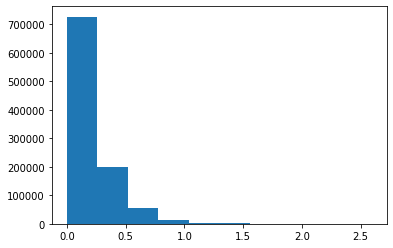

In [26]:
plt.hist(exponentials)

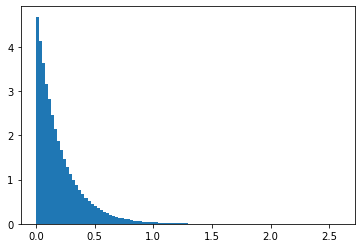

In [27]:
plt.hist(exponentials, bins=100, density=True);

In [28]:
%config InlineBackend.figure_format = 'retina'

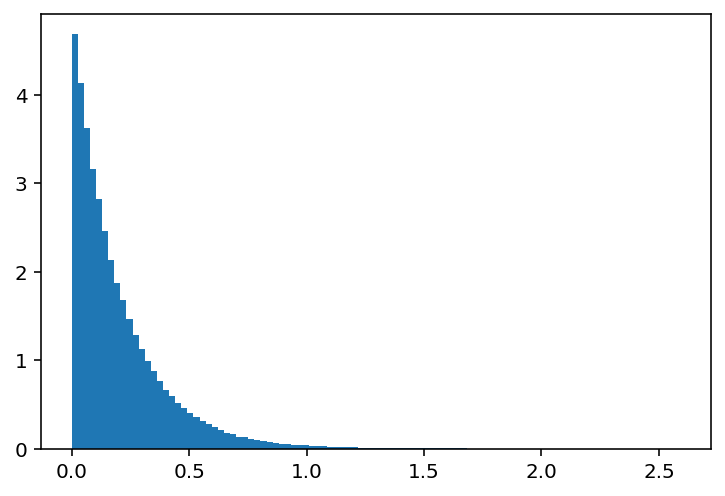

In [29]:
plt.hist(exponentials, bins=100, density=True);

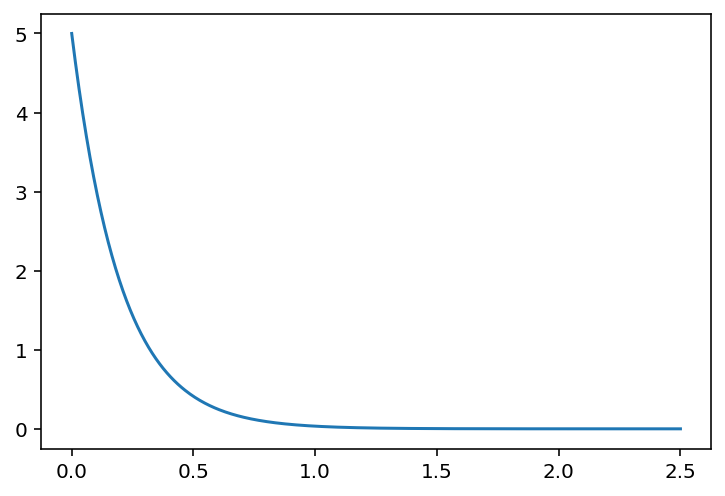

In [30]:
x = np.linspace(0, 2.5, 500)
pdf = λ * np.exp(-λ*x)
plt.plot(x, pdf);

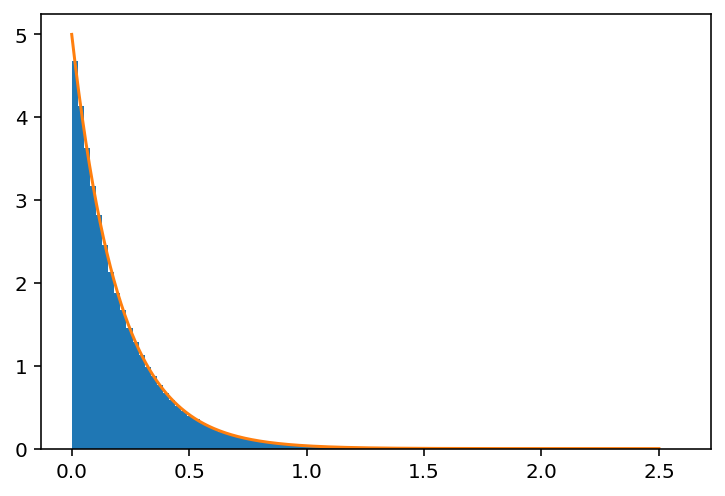

In [31]:
plt.hist(exponentials, bins=100, density=True);
plt.plot(x, pdf); # Or plt.plot(x, pdf, 'r');

Try again with $R = 10^5$ $\mathsf{Gamma}(2,3)$ random variables, where our definition of $\mathsf{Gamma}(r,m)$ has the p.d.f. 


$$ f(x) = \begin{cases} 
    \frac{x^{r-1} \mathrm{e}^{-\frac{x}{m}}}{\Gamma(r) m^r}   & \text{if } x > 0 \\
    0 & \text{otherwise.}
\end{cases} $$



In [32]:
R = 10**5
r = 2
m = 3
gammas = rng.gamma(r, m, R)

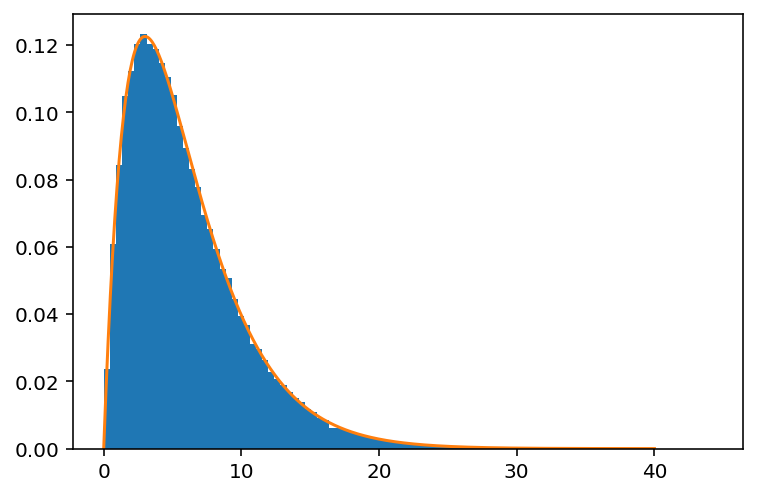

In [33]:
x = np.linspace(0, 40, 500)
pdf = (x**(r-1) * np.exp(-x/m)) / (gamma(r) * m**r)

plt.hist(gammas, bins=100, density=True)
plt.plot(x, pdf);

In [34]:
R = 10**4

# Mean vector and covariance matrix
n = 2
μ = (1, 2)
σ2 = 2
ρ = 0.8
Σ = σ2 * ( (1-ρ) * np.eye(n) + ρ * np.ones(n) )

# Simulating the index value at T
rng = rnd.default_rng()
normals = rng.multivariate_normal(μ, Σ, size=R)

In [35]:
import pandas as pd

df = pd.DataFrame(normals, columns=["x", "y"])
df

,x,y
0,-0.228046,1.382743
1,0.351114,1.827377
2,1.752873,3.419312
3,4.276756,5.734045
4,2.827853,4.172706
...,...,...
9995,-2.081927,-0.750787
9996,2.892714,2.892638
9997,1.445032,2.041335
9998,1.598780,2.429420


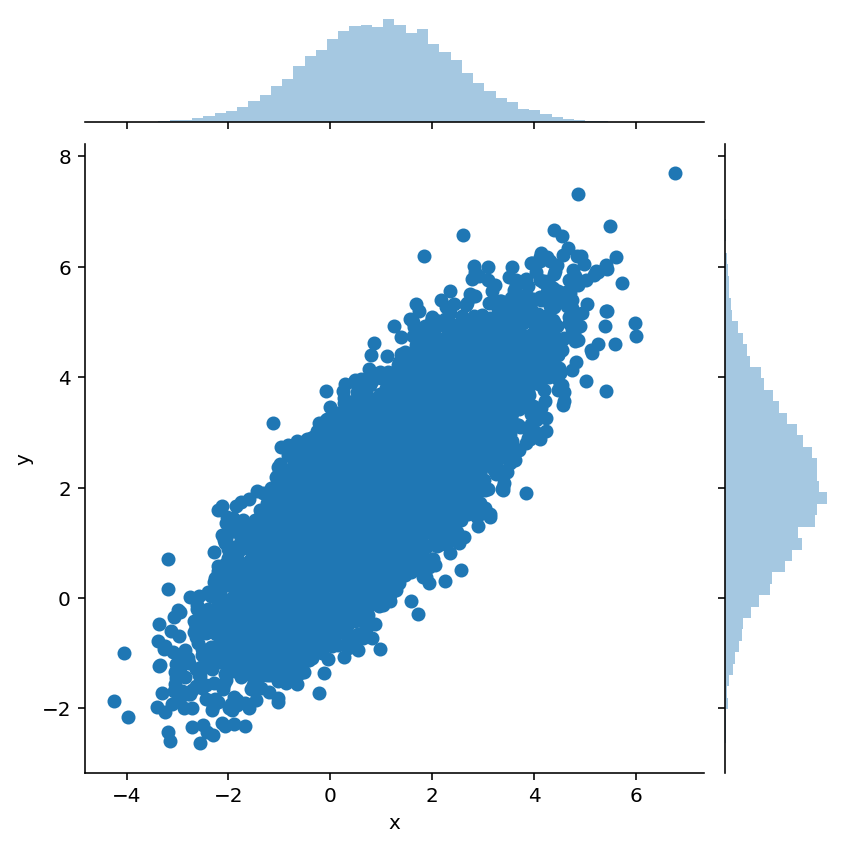

In [36]:
import seaborn as sns

sns.jointplot(x="x", y="y", data=df);

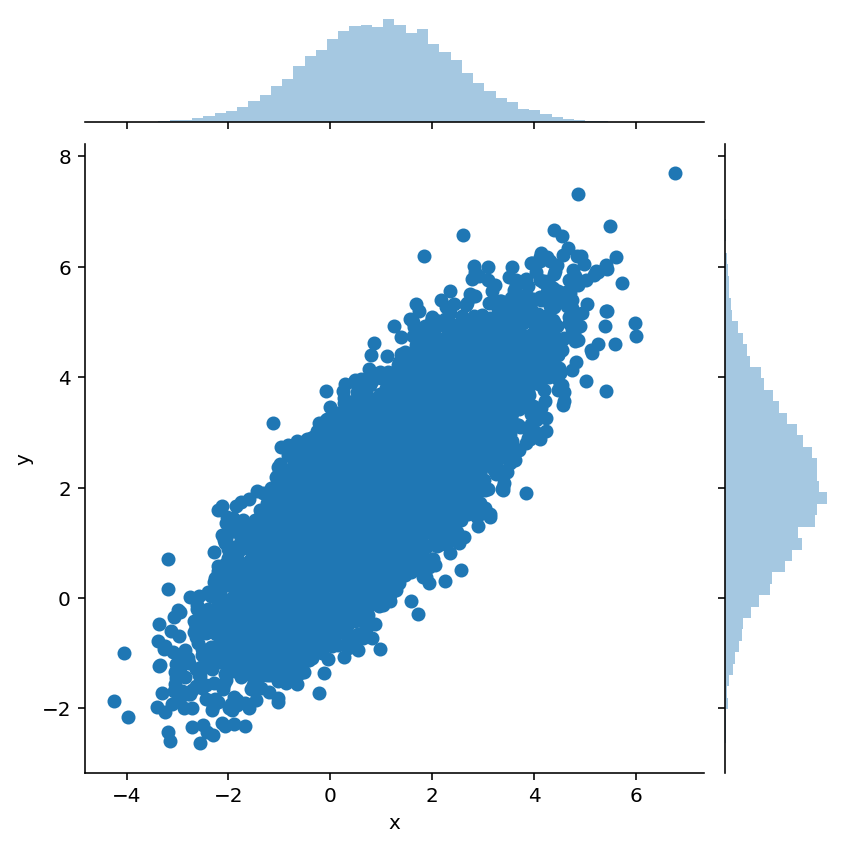

In [37]:
sns.jointplot(x="x", y="y", data=df);

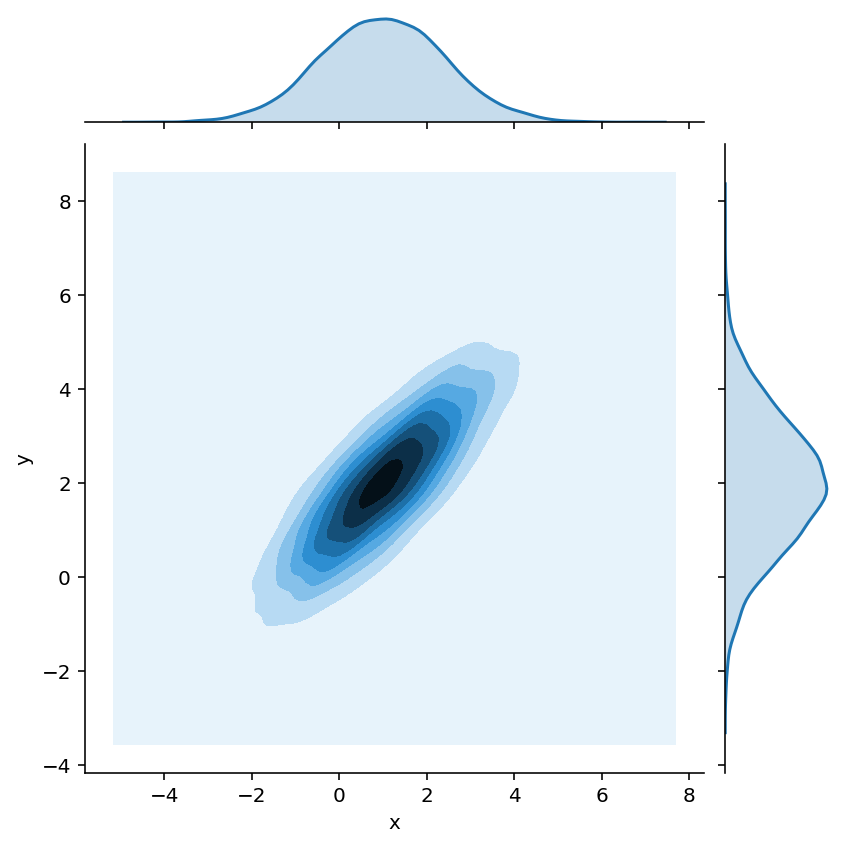

In [38]:
sns.jointplot(x="x", y="y", data=df, kind="kde");

### Crude Monte Carlo

Say that an insurer has $n = 10$ claims each month, and each claim size is $X_i \overset{\mathrm{i.i.d.}}{\sim} \mathsf{Pareto}(\alpha=\frac32)$. The reinsurer will cover the excess of $S_n = \sum_{i=1}^n X_i$ over the threshold $\gamma = 10^2$. 

What is the probability of reinsurer having to payout?

In [39]:
n = 10
α = 3/2
γ = 10**2
R = 10**6

In [40]:
%%time

rng = rnd.default_rng(1)
numPayouts = 0

for r in range(R):
    S_n = rng.pareto(α, size=n).sum()
    if S_n > γ:
        numPayouts += 1
    
print("Probability of reinsurer paying out:", numPayouts / R)

Probability of reinsurer paying out: 0.013021
Wall time: 7.31 s


This last cell is quite clunky and slow; please never write code like that. The preferred way is the vectorised code below. Firstly note that if we give a list to the `size=` parameter (actually we use an immutable list called a 'tuple') it returns a matrix of i.i.d. Paretos:

In [41]:
rng.pareto(α, size=(2,2))

array([[1.10960099, 0.77188112],
       [0.18992703, 1.286972  ]])

Now if we generate all the Pareto variable we need at once, everything is more efficient.

In [42]:
%%time

rng = rnd.default_rng(1)
losses = rng.pareto(α, size=(R,n)).sum(axis=1)

ests = losses > γ
ellHat = ests.mean()

print("Probability of reinsurer paying out:", ellHat)

Probability of reinsurer paying out: 0.013021
Wall time: 360 ms


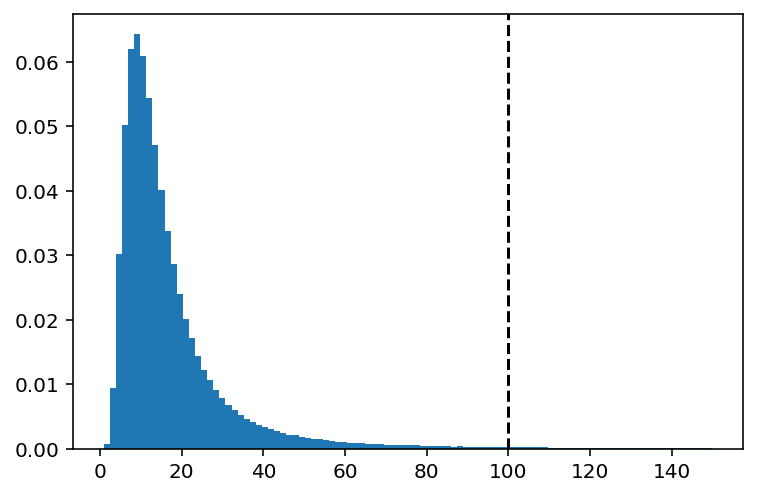

In [43]:
plt.hist(losses[losses < 1.5*γ], bins=100, density=True)
plt.axvline(γ, color="black", linestyle="dashed");

In [44]:
sigmaHat = ests.std()
widthCI = 1.96 * sigmaHat / np.sqrt(R)
CIs = (ellHat - widthCI, ellHat + widthCI)
print(f"Probability of reinsurer paying out: {ellHat} (+- {widthCI:f}))")

Probability of reinsurer paying out: 0.013021 (+- 0.000222))


_Bonus question: Can compare to [series expansion](http://docs.isfa.fr/labo/2012.16.pdf) by ISFA's Quang Huy NGUYEN & Christian ROBERT._

How much is the reinsurer paying out on average?

In [45]:
rng = rnd.default_rng(1)
losses = rng.pareto(α, size=(R,n)).sum(axis=1)
payouts = np.maximum(losses - γ, 0)

np.mean(payouts)

2.5494052977235837

__Note__: We can't calculate confidence intervals here using the normal approach. We're in the unlucky case that our variables have infinite variance and the CLT doesn't apply.

What is the expected payout for the of reinsurer conditioned on the event of a payout?

In [46]:
rng = rnd.default_rng(1)
losses = rng.pareto(α, size=(R,n)).sum(axis=1)
bigLosses = losses[losses > γ]
payouts = bigLosses - γ

np.mean(payouts)

195.79182072986583

We had 13021 reinsurer payouts out of 10^6 simulations.


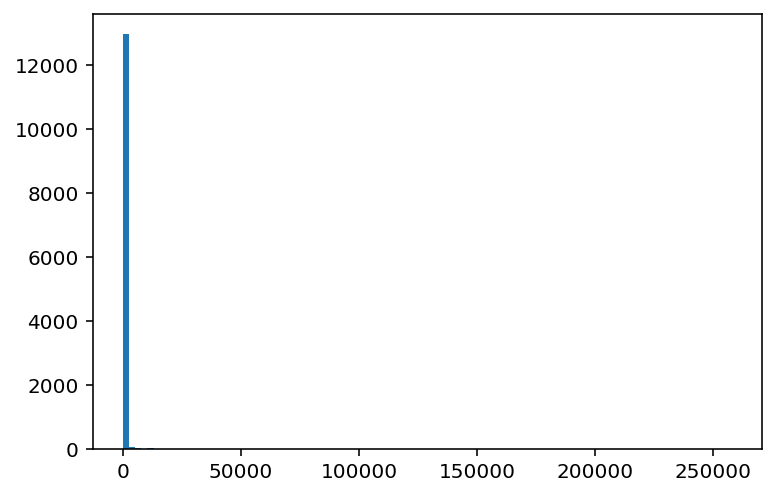

In [47]:
print(f"We had {len(bigLosses)} reinsurer payouts out of 10^{int(np.log10(R))} simulations.")
plt.hist(bigLosses, bins=100);

What about the 99.9% Value-at-Risk for the reinsurer?

In [48]:
rng = rnd.default_rng(1)

losses = rng.pareto(α, size=(R,n)).sum(axis=1)
payouts = np.maximum(losses - γ, 0)

np.quantile(payouts, 0.999)

377.0792235808656

Let's consider a financial example. Say that $X_i$ is the future stock price for company $i$ at expiry time $T$. 
We assume the Black-Scholes model, so $X_i \sim \mathsf{Lognormal}(\mu_i, \sigma^2)$, and assume a constant correlation $\rho$ between each pair of stocks.

Let's imagine we have a simple index which tracks $n$ of these stocks, so at time $T$ is will have the value
$$ S_T = \sum_{i=1}^n X_i . $$


What would be the value of a call option on this index, i.e., what is
$$ \mathbb{E}[ \mathrm{e}^{-r T} ( S_T - K )_+ ] \, ?$$
(Let's ignore the $\mathbb{Q}$ measure here.)

Set $n = 2$, $r = 0.05$, $T = 1$, $\mu_i = \frac{i}{10}$, $\sigma^2 = \frac{1}{10}$, $\rho = 0.25$, $K = 2$.

In [49]:
# Problem constants
n = 2
r = 0.05
T = 1
K = 3
ρ = -0.5
σ2 = 1/10
R = 10**6

# Mean vector and covariance matrix
μ = np.arange(1, n+1) / 10
Σ = σ2 * ( (1-ρ) * np.eye(n) + ρ * np.ones(n) )

# Simulating the index value at T
rng = rnd.default_rng()
normals = rng.multivariate_normal(μ, Σ, size=R)
Xs = np.exp(normals)
Ss = Xs.sum(axis=1)

# Calculating the MC estimate and CIs
ests = np.exp(-r*T) * np.maximum(Ss - K, 0)
ellHat = ests.mean()
sigmaHat = ests.std()
widthCI = 1.96 * sigmaHat / np.sqrt(R)

print(f"Option value: {ellHat} (+- {widthCI:f}))")

ests = (Ss > K)
ellHat = ests.mean()
sigmaHat = ests.std()
widthCI = 1.96 * sigmaHat / np.sqrt(R)
print(f"Probability of payout: {ellHat} (+- {widthCI:f}))")

Option value: 0.024134250001376582 (+- 0.000208))
Probability of payout: 0.094762 (+- 0.000574))


In [50]:
Ss.mean()

2.4458187502697877